# Pythagorean problem

In [1]:
using IRKGaussLegendre
using Plots, LinearAlgebra, LaTeXStrings

In [2]:
function NbodyODE!(du,u,Gm,t)
     N = length(Gm)
     du[1,:,:] .= 0
     for i in 1:N
        qi = u[2,:,i]
        Gmi = Gm[i]
        du[2,:,i] = u[1,:,i]
        for j in (i+1):N
           qj = u[2,:,j]
           Gmj = Gm[j]
           qij = qi - qj
           auxij = (qij[1]*qij[1]+qij[2]*qij[2]+qij[3]*qij[3])^(-3/2)
           du[1,:,i] -= Gmj*auxij*qij
           du[1,:,j] += Gmi*auxij*qij
        end
     end

    return
end

NbodyODE! (generic function with 1 method)

In [3]:
Gm = [5, 4, 3]
N=length(Gm)
q=[1,-1,0,-2,-1,0,1,3,0]
v=zeros(size(q))
q0 = reshape(q,3,:)
v0 = reshape(v,3,:)
u0 = Array{Float64}(undef,2,3,N)
u0[1,:,:] = v0
u0[2,:,:] = q0
tspan = (0.0,63.0)
prob=ODEProblem(NbodyODE!,u0,tspan,Gm);

In [58]:
sol1=solve(prob,IRKGL16(),adaptive=true, reltol=1e-12, abstol=1e-12);
@show(length(sol1.t))
[sol1.t[80] sol1.t[200] sol1.t[end]]

length(sol1.t) = 1027


1×3 Matrix{Float64}:
 4.13069  14.692  63.0

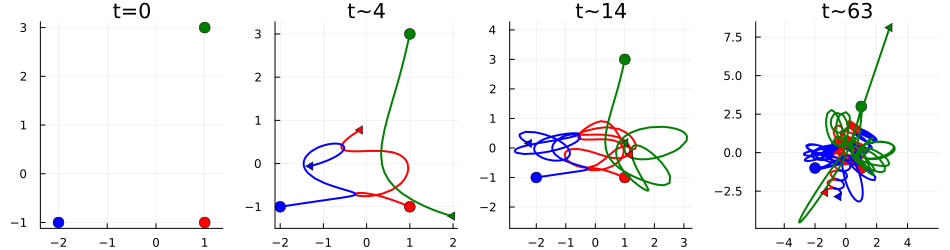

In [76]:
bodylist = ["Body-1", "Body-2", "Body-3"]
colors= ["red", "blue", "green"]
pl1 = plot(title="t=0",aspect_ratio=1)


ulist1 = sol1.u[1:1]
tlist1 = sol1.t[1:1]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl1 = plot!(xlist,ylist, seriestypes=:scatter, color=colors[j]
                        , markersize=6, label = "")   
end 


plot(pl1)


######################################################

pl2 = plot(title="t~4",aspect_ratio=1)
k=80

ulist1 = sol1.u[1:1]
tlist1 = sol1.t[1:1]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl2 = plot!(xlist,ylist, seriestypes=:scatter, color=colors[j]
                        , markersize=6, label = "")   
end 

ulist1 = sol1.u[1:k]
tlist1 = sol1.t[1:1k]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl2 = plot!(xlist,ylist,  lw=2,color=colors[j],label = "")   
end 


ulist1 = sol1.u[k:k]
tlist1 = sol1.t[k:k]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl2 = plot!(xlist,ylist, seriestypes=:scatter
                        , shape=:ltriangle
                        , color=colors[j]
                        , markersize=6, label = "")   
end 

######################################################

pl3 = plot(title="t~14",aspect_ratio=1)
k=200

ulist1 = sol1.u[1:1]
tlist1 = sol1.t[1:1]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl3 = plot!(xlist,ylist, seriestypes=:scatter, color=colors[j]
                        , markersize=6, label = "")   
end 

ulist1 = sol1.u[1:k]
tlist1 = sol1.t[1:1k]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl3 = plot!(xlist,ylist,  lw=2,color=colors[j],label = "")   
end 


ulist1 = sol1.u[k:k]
tlist1 = sol1.t[k:k]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl3 = plot!(xlist,ylist, seriestypes=:scatter
                        , shape=:ltriangle
                        , color=colors[j]
                        , markersize=6, label = "")   
end 


######################################################

pl4 = plot(title="t~63",aspect_ratio=1)
k=length(sol1.t)

ulist1 = sol1.u[1:1]
tlist1 = sol1.t[1:1]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl4 = plot!(xlist,ylist, seriestypes=:scatter, color=colors[j]
                        , markersize=6, label = "")   
end 

ulist1 = sol1.u[1:k]
tlist1 = sol1.t[1:1k]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl4 = plot!(xlist,ylist,  lw=2,color=colors[j],label = "")   
end 

ulist1 = sol1.u[k:k]
tlist1 = sol1.t[k:k]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl4 = plot!(xlist,ylist, seriestypes=:scatter
                        , shape=:ltriangle
                        , color=colors[j]
                        , markersize=6, label = "")   
end 


plot(pl1, pl2, pl3, pl4, 
layout=(1,4), size=(950,250),plot_title="")

In [77]:
savefig("./PythagoreanP")

"/home/mikel/Mahaigaina/Work-2021-2022/PIC/PIC-2022-2023/Atxiki Plazak/Aurkezpena/Irudi laguntzailea/PythagoreanP.png"